# Bot classifier

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.externals import joblib
from sklearn import model_selection, linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import pickle
from functools import reduce

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import missingno as msno

In [ ]:
context = pd.read_csv('data/bon/bots/context_score.csv')

In [ ]:
def merge_dataframes(category):
    
    global df4
    df0 = pd.read_csv('data/bon/' + category + '/context_score.csv')
    print(len(df0))
    df1 = pd.read_csv('data/bon/' + category + '/descriptive_features.csv')
    print(len(df1))
    df2 = pd.read_csv('data/bon/' + category + '/tweet_intradistance.csv')
    print(len(df2))to90xcjncf
    df3 = pd.read_csv('data/bon/' + category + '/url_entropy.csv')
    print(len(df3))
    #df4 = pd.read_csv('data/bon/' + category + '/users.csv', encoding="utf-8-sig", engine="python")
    #print(len(df4))
    df4 = df4.rename(columns={'id': 'user_id'})
    
    dfs = [df0, df1, df2, df3, df4]
    
    df_final = reduce(lambda left,right: pd.merge(left,right,on='user_id'), dfs)
    print(df_final.shape)

    return df_final

In [ ]:
df4 = pd.read_csv('data/bon/humans/users.csv', encoding="utf-8-sig", engine="python")

In [ ]:
index

In [ ]:
index = []
for i, r in df4.iterrows():
    try:
        int(r.user_id)
    except:
        index.append(i)

In [ ]:
df4.user_id = df4.user_id.astype(int)

In [ ]:
bot_df = merge_dataframes('bots')

In [ ]:
gen_df['target'] = 0
bot_df['target'] = 1

In [ ]:
full = gen_df.append(bot_df, ignore_index=True)

In [ ]:
full.columns

## Data exploration

In [ ]:
full.describe()

Delete naive features 

In [ ]:
full = full.drop(columns=['contributors_enabled', 'follow_request_sent', 'following', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_image_url', 'profile_image_url_https', 'time_zone', 'utc_offset'])

plot missing values

In [ ]:
features = full.columns

In [ ]:
msno.matrix(full)

plot missing values for each target

In [ ]:
msno.matrix(full[full.target==0])

In [ ]:
msno.matrix(full[full.target==1])

In [ ]:
msno.matrix(full[full.target==0][features[25:]])

Remove features with too many missing values for some target

In [ ]:
full = full.drop(columns=['default_profile_image','is_translator', 'geo_enabled', 'location', 'notifications', 'profile_background_tile', 'protected', 'verified'])

In [ ]:
msno.matrix(full)

In [ ]:
full.default_profile.describe()

In [ ]:
full[full.target==0].default_profile.describe()

In [ ]:
full[full.target==1].default_profile.describe()

In [ ]:
full['default_profile'] = full['default_profile'].fillna(full['default_profile'].mode()[0])

In [ ]:
full['description'] = full['description'].fillna('')

In [ ]:
full['description_len'] = full['description'].apply(lambda x: len(x))

In [ ]:
full = full.drop(columns=['description'])

In [ ]:
full['name'] = full['name'].fillna('')

In [ ]:
full['name_len'] = full['name'].apply(lambda x: len(x))

In [ ]:
full = full.drop(columns=['name'])

In [ ]:
full['screen_name'] = full['screen_name'].fillna('')

In [ ]:
full['screen_name_len'] = full['screen_name'].apply(lambda x: len(x))

In [ ]:
full = full.drop(columns=['screen_name'])

In [ ]:
full = full.drop(columns=['lang'])

In [ ]:
def oldness(x):
    if x[0] == '2':
        return 2018 - int(x[:4])
    else:
        return 2018 - int(x[-4:])

In [ ]:
types = []
for elem in full['created_at']:
    types.append(type(elem))
set(types)

In [ ]:
mask = full['created_at'].isnull()

In [ ]:
full.drop(full.index[mask], inplace=True)

In [ ]:
full['age'] = full['created_at'].apply(lambda x: oldness(x))

In [ ]:
full = full.drop(columns=['created_at'])

In [ ]:
full['profile_use_background_image'][full.target==0].value_counts()

In [ ]:
full['profile_use_background_image'][full.target==1].value_counts()

In [ ]:
full['profile_use_background_image'] = (full['profile_use_background_image'].notnull()).astype(int)

In [ ]:
full['profile_use_background_image'] = full['profile_use_background_image'].fillna(full['profile_use_background_image'].mode()[0])

In [ ]:
full['url'] = (full['url'].notnull()).astype(int)

verifico che non ci siano più missing values

In [ ]:
full.isnull().astype(int).sum()

In [ ]:
full.drop(columns=['profile_background_color', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color','profile_text_color'], inplace=True)      

In [ ]:
full.describe()

In [ ]:
full['default_profile'] = (full['default_profile'].notnull()).astype(int)
full['statuses_count'] = (full['statuses_count'].notnull()).astype(int)
full['user_id'] = (full['user_id'].notnull()).astype(int)

In [ ]:
full.to_csv('data/bon/full_preproc_train.csv', index=False)

# riparti da qui per evitare preprocessing

In [162]:
full = pd.read_csv('data/bon/bon_train.csv')

In [137]:
len(full)

31212

In [138]:
len(full.loc[full.target==0])

15687

In [139]:
len(full.loc[full.target==1])

15525

In [10]:
full.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'default_profile',
       'profile_use_background_image', 'verified', 'avg_len', 'max_len',
       'min_len', 'avg_ret', 'max_ret', 'min_ret', 'avg_fav', 'max_fav',
       'min_fav', 'avg_hash', 'max_hash', 'min_hash', 'freq', 'ret_perc',
       'media_perc', 'url_perc', 'quote_perc', 'url_entropy',
       'tweet_intradistance', 'bot_words_score', 'gen_words_score', 'target',
       'description_len', 'name_len', 'screen_name_len', 'age'],
      dtype='object')

In [8]:
def predict(X, y, n_trees=10, knn=4):
    
    forest = RandomForestClassifier(n_estimators = n_trees)
    logreg = linear_model.LogisticRegression(max_iter=1000, solver="liblinear")
    
    scaler = MinMaxScaler()
    X_n = scaler.fit_transform(X)
    knn = KNeighborsClassifier(n_neighbors=knn)
    SVM = svm.SVC()
    scoring = ['roc_auc']
    scores = []
    scores.append(cross_validate(forest, X, y, cv=10, scoring=scoring))
    scores.append(cross_validate(logreg, X, y, cv=10, scoring=scoring))
    scores.append(cross_validate(knn, X_n, y, cv=10, scoring=scoring))
    scores.append(cross_validate(knn, X, y, cv=10, scoring=scoring))
    scores.append(cross_validate(SVM, X, y, cv=10, scoring=scoring))
    
    return scores

In [11]:
# split X,y
X = full.drop(columns=['target'])
y = full['target']

In [12]:
X.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'default_profile',
       'profile_use_background_image', 'verified', 'avg_len', 'max_len',
       'min_len', 'avg_ret', 'max_ret', 'min_ret', 'avg_fav', 'max_fav',
       'min_fav', 'avg_hash', 'max_hash', 'min_hash', 'freq', 'ret_perc',
       'media_perc', 'url_perc', 'quote_perc', 'url_entropy',
       'tweet_intradistance', 'bot_words_score', 'gen_words_score',
       'description_len', 'name_len', 'screen_name_len', 'age'],
      dtype='object')

## Holdout

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
# Fitting Random Forest Classification to the Training set
forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
# Fitting Logistic Regression
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Fitting SVM
SVM = svm.SVC(decision_function_shape='ovo')
SVM.fit(X_train, y_train)

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Holdout score - forest

In [39]:
# Predicting the Test set results
y_pred = forest.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Target'], colnames=['Predicted Target']))
print("AUC:" + str(roc_auc_score(y_test, y_pred)))

Predicted Target     0     1
Actual Target               
0                 4314   336
1                  554  4160
AUC:0.9051098307033271


### Most important features

In [25]:
sorted(zip(map(lambda x: round(x, 2), forest.feature_importances_), X.columns), reverse=True)[:10]

[(0.15, 'age'),
 (0.12, 'friends_count'),
 (0.09, 'statuses_count'),
 (0.07, 'followers_count'),
 (0.07, 'favourites_count'),
 (0.04, 'min_len'),
 (0.04, 'bot_words_score'),
 (0.04, 'avg_ret'),
 (0.03, 'max_ret'),
 (0.03, 'listed_count')]

### Holdout score - logistic regression

In [26]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Target'], colnames=['Predicted Target']))
print("AUC:" + str(roc_auc_score(y_test, y_pred)))

Predicted Target     0     1
Actual Target               
0                 3124  1526
1                  558  4156
AUC:0.7767285733185524


## KNN

In [27]:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.fit_transform(X_test)
X_n = scaler.fit_transform(X)

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_n, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

### Holdout score - KNN

In [29]:
# Predicting the Test set results
y_pred = knn.predict(X_test_n)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Target'], colnames=['Predicted Target']))
print("AUC:" + str(roc_auc_score(y_test, y_pred)))

Predicted Target     0     1
Actual Target               
0                 3698   952
1                 1129  3585
AUC:0.7778847268032536


### Holdout score - SVM

In [30]:
# Predicting the Test set results
y_pred = SVM.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Target'], colnames=['Predicted Target']))
print("AUC:" + str(roc_auc_score(y_test, y_pred)))

Predicted Target     0   1
Actual Target             
0                 4625  25
1                 4676  38
AUC:0.5013423752628866


## 10-Fold-CV

In [13]:
baselines = predict(X,y)

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 

## RF scores:

In [15]:
print("AUC:")
print(baselines[0]['test_roc_auc'].mean())

AUC:
0.9407389820720429


## LogReg Scores:

In [16]:
print("AUC:")
print(baselines[1]['test_roc_auc'].mean())

AUC:
0.8443566244156194


## KNN scores:

In [42]:
print("AUC:")
print(baselines[2]['test_roc_auc'].mean())

AUC:
0.8215310768365942


## Normalized KNN scores:

In [18]:
print("AUC:")
print(baselines[3]['test_roc_auc'].mean())

AUC:
0.8788747008657101


## SVM scores:

In [19]:
print("AUC:")
print(baselines[4]['test_roc_auc'].mean())

AUC:
0.5240039334865573


# Grid Search

In [53]:
def grid_search(X, y, model, params):
    
    scoring = ['roc_auc']
    grid = GridSearchCV(model, params, cv=10, scoring=scoring, refit=False)
    grid.fit(X, y)
    
    return grid

### Random Forest

In [44]:
params = {'n_estimators':[150,200,250,300,350,400,450,500], 'max_depth':[None,26,28], 'criterion':['entropy']}
model = RandomForestClassifier()

rf_grid = grid_search(X, y, model, params)

In [45]:
n_estimators = [150,200,250,300,350,400,450,500]
max_depth = [26,28,None]

In [46]:
results = pd.DataFrame(rf_grid.cv_results_)

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_roc_auc'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_roc_auc'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_roc_auc'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Lorenzo/anacond

In [47]:
results.sort_values(by=['param_max_depth'])[['param_n_estimators', 'param_max_depth','mean_test_roc_auc']]

,param_n_estimators,param_max_depth,mean_test_roc_auc
8,150,26,0.960758
9,200,26,0.960803
10,250,26,0.960917
11,300,26,0.961126
12,350,26,0.961049
13,400,26,0.960932
14,450,26,0.961575
15,500,26,0.961538
16,150,28,0.960422
17,200,28,0.960993


In [79]:
X.drop(columns=['age'], inplace=True)

In [81]:
len(X.columns)

34

## Visualize Results

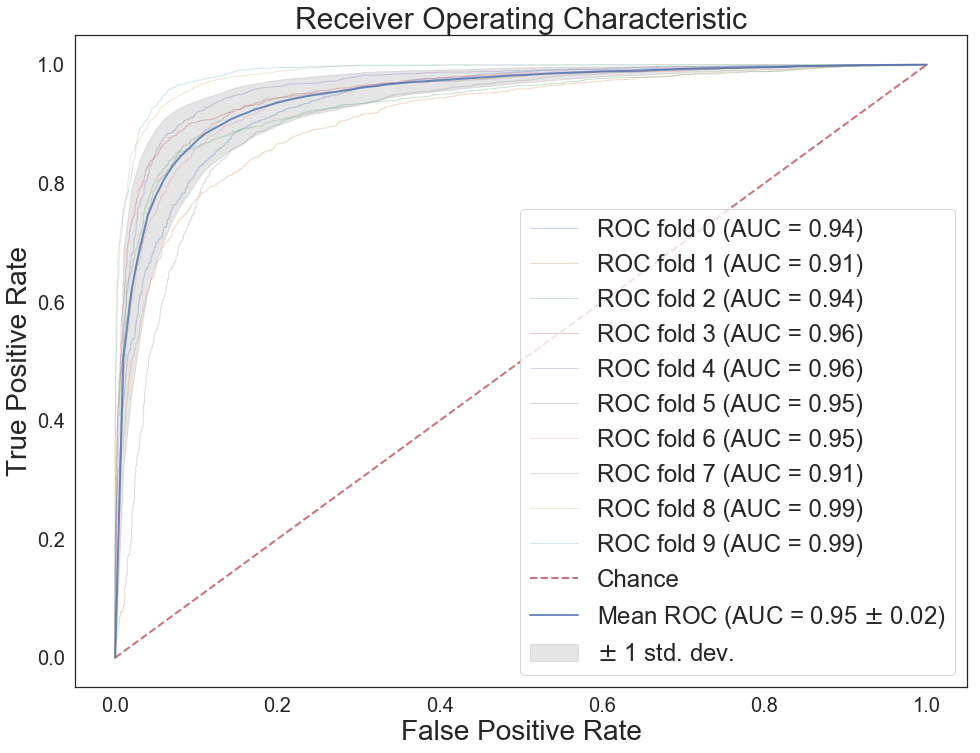

In [82]:
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators=600, criterion='entropy', max_depth=26)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(16,12))

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('False Positive Rate', fontsize=28)
plt.ylabel('True Positive Rate', fontsize=28)
plt.title('Receiver Operating Characteristic', fontsize=30)
plt.legend(loc="lower right", fontsize=24)
plt.savefig('data/bot_or_not/refill_auc.png')
plt.show()

In [58]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, title, filename):
    # Get Test Scores Mean and std for each grid search
    
    cv_results.reset_index(drop=True, inplace=True)
    scores_mean = cv_results['mean_test_roc_auc']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_roc_auc']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
    

    # Plot Grid search scores
    fig, ax = plt.subplots(1,1, figsize=(16,12))
    

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    
    for idx, val in enumerate(grid_param_2):
        
        ax.plot(grid_param_1, scores_mean[idx,:], '-', label= name_param_2 + ': ' + str(val), linewidth=4,)
    
    
    
    best_index = cv_results['mean_test_roc_auc'].values.argmax()
    best_param = cv_results.loc[best_index]['param_n_estimators']
    best_score = cv_results['mean_test_roc_auc'].max()
    min_score = cv_results['mean_test_roc_auc'].min()
    plt.axvline(x=best_param, linestyle=':', color='grey', linewidth=2)
    
    # Plot a dotted vertical line at the best score for that scorer marked by x
    plt.plot([best_param,], [best_score],
           linestyle=':', color='black', marker='x',markeredgewidth=3,markersize=26, ms=8)
    
    plt.annotate("%0.4f (n_estimatores = %d)" % (best_score, best_param),
                    (best_param-220, best_score+0.00001), fontsize=24)
    

    ax.tick_params(labelsize=20)
    ax.set_title(title, fontsize=30)
    ax.set_xlabel(name_param_1, fontsize=28)
    ax.set_ylabel('AUC Score', fontsize=28)
    ax.legend(loc="lower right", fontsize=22)
    ax.grid('on')
    fig.savefig('data/full/'+ filename +'.png')

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


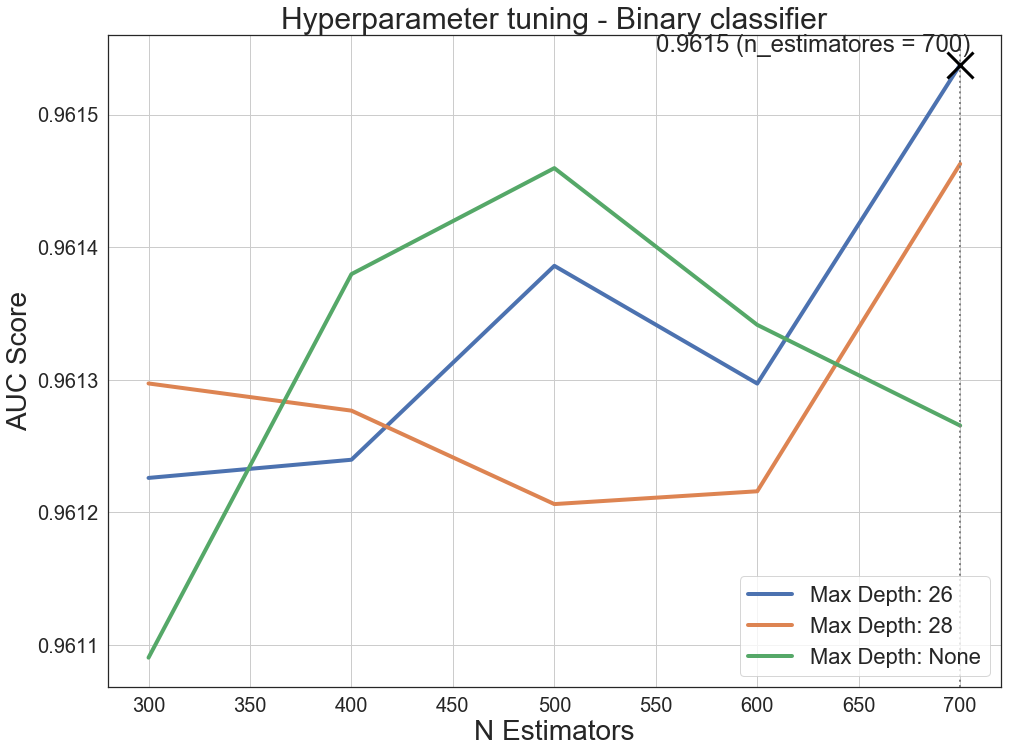

In [183]:
plot_grid_search(results.sort_values(by=['param_max_depth', 'param_n_estimators']), n_estimators, max_depth, 'N Estimators', 'Max Depth', 'Hyperparameter tuning - Binary classifier', 'bon_tuning')

### Max depth tuning

In [134]:
import time
start = time.time()
model = RandomForestClassifier(n_estimators=450, criterion='entropy', max_depth=26)
model.fit(X,y)
end = time.time()
print("Fitting time: " + str(end - start))

Fitting time: 46.012643814086914


In [53]:
start = time.time()
model.predict_proba(np.array(X.iloc[0]).reshape(1, -1))
end = time.time()
print("Prediction time: " + str(end - start))

Prediction time: 0.08359694480895996


In [135]:
pickle.dump(model, open("../scripts/bon.model", "wb"))

# Validation with our data

In [26]:
def plot_importance(forest, feature_group, X, limit):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1][:len(importances)]

    # Print the feature ranking
    print("Feature ranking:")

    for f,i in zip(range(len(importances)),indices):
        print("%d. %s (%f)" % (f + 1, X.columns[i], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.figure(figsize=(20,10))

    plt.title("Feature importances", fontsize=30)
    plt.bar(range(12), importances[indices[:12]],
           color="r", yerr=std[indices[:12]], align="center")
    labels = []
    for l in X.columns[indices[:12]]:
        labels.append(str(l[0:limit]) + '...')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=28)
    plt.xticks(range(len(importances)), labels)
    plt.xlim([-1, 12])
    plt.savefig('data/full/' + feature_group + '_importances.png')
    plt.show()

Feature ranking:
1. age (0.160250)
2. friends_count (0.112315)
3. statuses_count (0.081367)
4. favourites_count (0.077987)
5. followers_count (0.073188)
6. bot_words_score (0.045886)
7. min_len (0.043949)
8. gen_words_score (0.035958)
9. max_ret (0.034815)
10. avg_ret (0.030498)
11. listed_count (0.029437)
12. avg_len (0.023411)


<Figure size 432x288 with 0 Axes>

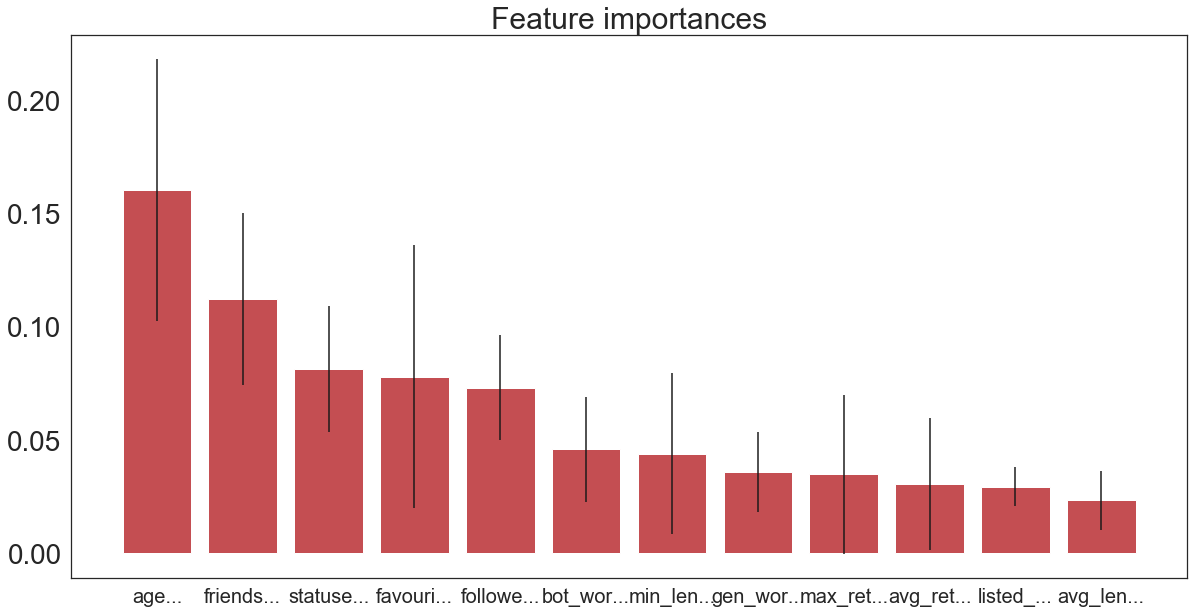

In [147]:
plot_importance(model, 'bon_importances', X, 7)

In [14]:
val = pd.read_csv('data/bon/validation.csv')

In [17]:
X = X.reindex(sorted(X.columns), axis=1)
val = val.reindex(sorted(val.columns), axis=1)

NameError: name 'X' is not defined

In [97]:
X.head()

,age,avg_fav,avg_hash,avg_len,avg_ret,bot_words_score,default_profile,description_len,favourites_count,followers_count,...,profile_use_background_image,quote_perc,ret_perc,screen_name_len,statuses_count,tweet_intradistance,url,url_entropy,url_perc,verified
0,12,0.00,0.91,103.74,0.20,0.014100,False,123,0.0,859.0,...,True,0.00,0.02,9,315,11.412657,1,1.500000,0.04,0
1,12,0.20,1.22,127.78,2250.18,0.023543,False,159,9914.0,9930.0,...,True,0.04,0.33,12,104101,13.955710,1,2.084171,0.65,0
2,11,0.35,0.21,92.11,0.00,0.012278,False,66,299.0,5948.0,...,True,0.00,0.00,11,25586,12.832708,1,1.754533,0.29,0
3,11,0.04,0.06,104.83,1.64,0.055719,False,0,18.0,7674.0,...,True,0.00,0.01,6,2456,10.846554,0,0.875819,0.78,0
4,11,0.04,0.11,112.63,0.06,0.007555,False,148,0.0,196.0,...,True,0.00,0.00,6,1486,14.812794,1,1.880180,0.21,0


In [18]:
val.head()

,age,avg_fav,avg_hash,avg_len,avg_ret,bot_words_score,default_profile,description_len,favourites_count,followers_count,...,quote_perc,ret_perc,screen_name_len,statuses_count,target,tweet_intradistance,url,url_entropy,url_perc,verified
0,9,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,94,46,...,0.000000,0.000000,7,3762,0,0.000000,0,0.000000,0.000000,0
1,3,0.000000,0.000000,101.653061,31320.959184,0.020382,1,11,1285,100,...,0.295918,0.775510,8,692,0,13.019156,0,0.000000,0.469388,0
2,6,0.467742,0.080645,52.612903,23.177419,0.000000,1,0,17,31,...,0.000000,0.112903,9,57,0,8.589957,0,1.000000,0.032258,0
3,9,0.030000,0.540000,76.500000,28.510000,0.000926,1,75,0,106,...,0.020000,0.030000,14,2249,0,12.227818,1,2.931209,0.150000,0
4,7,0.000000,0.000000,0.000000,0.000000,0.000000,1,40,10150,1574,...,0.000000,0.000000,12,77001,0,0.000000,0,0.000000,0.000000,0


## Complete

In [111]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
X_test = val.drop(columns=["target"])
y_test = val['target']

In [113]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Target'], colnames=['Predicted Target']))
print("AUC:" + str(roc_auc_score(y_test, y_pred)))

Predicted Target    0     1
Actual Target              
0                 558  2442
1                 158  2842
AUC:0.5666666666666668


## Without STATUSES_COUNT

In [121]:
model.fit(X.drop(columns=["statuses_count"]),y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
X_test = val.drop(columns=["target","statuses_count"])
y_test = val['target']

In [123]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Target'], colnames=['Predicted Target']))
print("AUC:" + str(roc_auc_score(y_test, y_pred)))

Predicted Target    0     1
Actual Target              
0                 564  2436
1                 162  2838
AUC:0.567


## Without AGE

In [148]:
model.fit(X.drop(columns=["age"]),y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [149]:
X_test = val.drop(columns=["target",'age'])
y_test = val['target']

In [150]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Target'], colnames=['Predicted Target']))
print("AUC:" + str(roc_auc_score(y_test, y_pred)))

Predicted Target     0     1
Actual Target               
0                 2920    80
1                 1589  1411
AUC:0.7218333333333333


In [19]:
val.loc[val.target==0].describe()

,age,avg_fav,avg_hash,avg_len,avg_ret,bot_words_score,default_profile,description_len,favourites_count,followers_count,...,quote_perc,ret_perc,screen_name_len,statuses_count,target,tweet_intradistance,url,url_entropy,url_perc,verified
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,6.405667,2.776873,0.199729,65.666248,5383.265723,0.010560,0.976000,63.696000,4578.189667,1404.410333,...,0.075485,0.285128,10.866667,16569.490333,0.0,9.233155,0.369000,0.848236,0.158800,0.004333
std,1.942943,50.308350,0.418294,44.021173,10844.459511,0.015847,0.153075,51.177058,11660.477013,18335.118311,...,0.098625,0.297625,2.554290,30494.318235,0.0,5.528676,0.482614,1.148427,0.202012,0.065696
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,248.000000,144.750000,...,0.000000,0.000000,9.000000,1733.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.247312,0.045460,76.125606,537.435852,0.006891,1.000000,50.000000,1250.000000,334.000000,...,0.040000,0.191919,11.000000,6333.500000,0.0,11.648037,0.000000,0.000000,0.100000,0.000000
75%,8.000000,0.777778,0.212121,97.154796,5197.205000,0.015442,1.000000,106.000000,4650.750000,789.250000,...,0.117021,0.505331,13.000000,19066.000000,0.0,12.808392,1.000000,1.584963,0.212121,0.000000
max,11.000000,2388.727273,8.320000,259.110000,132651.390000,0.523691,1.000000,160.000000,313954.000000,986837.000000,...,0.700000,1.000000,15.000000,399555.000000,0.0,22.412290,1.000000,5.224558,1.000000,1.000000


In [108]:
full.reindex(sorted(X.columns), axis=1).loc[full.target==0].describe()

,age,avg_fav,avg_hash,avg_len,avg_ret,bot_words_score,default_profile,description_len,favourites_count,followers_count,...,profile_use_background_image,quote_perc,ret_perc,screen_name_len,statuses_count,tweet_intradistance,url,url_entropy,url_perc,verified
count,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,1.568700e+04,1.568700e+04,...,15687.000000,15687.000000,15687.000000,15687.000000,1.568700e+04,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,9.224007,1.913240,0.117677,75.027985,1314.964812,0.000064,0.101039,62.047747,3.515535e+03,1.110773e+04,...,0.884363,0.000064,0.002167,10.205712,3.121222e+04,9.874546,0.491299,0.855039,0.049723,0.020973
std,0.547550,40.537289,0.537202,41.814151,4526.147233,0.007984,0.301390,52.385252,1.665490e+04,2.051704e+05,...,0.319800,0.007984,0.046506,2.764841,7.158437e+04,4.485296,0.499940,1.121645,0.217378,0.143298
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,14.000000,7.000000e+00,1.470000e+02,...,1.000000,0.000000,0.000000,8.000000,2.956500e+03,10.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,80.000000,6.000000,0.000000,0.000000,51.000000,1.540000e+02,4.220000e+02,...,1.000000,0.000000,0.000000,10.000000,1.195500e+04,11.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.000000,0.000000,102.000000,585.500000,0.000000,0.000000,105.000000,1.490000e+03,1.204000e+03,...,1.000000,0.000000,0.000000,12.000000,3.341000e+04,12.000000,1.000000,2.000000,0.000000,0.000000
max,12.000000,3265.000000,20.000000,286.000000,178750.000000,1.000000,1.000000,202.000000,1.085821e+06,1.353651e+07,...,1.000000,1.000000,1.000000,15.000000,3.535183e+06,28.000000,1.000000,6.000000,1.000000,1.000000


In [109]:
val.loc[val.target==1].describe()

,age,avg_fav,avg_hash,avg_len,avg_ret,bot_words_score,default_profile,description_len,favourites_count,followers_count,...,quote_perc,ret_perc,screen_name_len,statuses_count,target,tweet_intradistance,url,url_entropy,url_perc,verified
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,...,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.504333,10.142937,0.198781,67.034282,1235.727903,0.014081,0.683333,55.106667,10585.049667,8.659666e+03,...,0.047381,0.310648,11.472333,1.643572e+04,1.0,8.442529,0.249333,1.061060,0.146245,0.004667
std,2.690302,210.288434,0.416654,55.125955,5915.806627,0.023036,0.465254,54.384230,38543.663988,2.397022e+05,...,0.086884,0.413984,2.575548,5.662299e+04,0.0,6.150977,0.432699,1.399916,0.245598,0.068165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,4.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,...,0.000000,0.000000,10.000000,2.200000e+01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.070588,70.310538,0.058140,0.008606,1.000000,45.000000,52.000000,3.300000e+01,...,0.000000,0.000000,12.000000,9.300000e+01,1.0,11.229733,0.000000,0.000000,0.010051,0.000000
75%,6.000000,0.068966,0.224490,117.005000,1096.173549,0.021674,1.000000,94.000000,536.500000,2.042500e+02,...,0.066667,0.750000,14.000000,5.640500e+03,1.0,13.602933,0.000000,2.321928,0.190119,0.000000
max,11.000000,9103.400000,8.720000,297.330000,247147.066667,0.457338,1.000000,170.000000,913239.000000,1.286337e+07,...,0.960000,1.000000,15.000000,1.417703e+06,1.0,21.402723,1.000000,5.596175,1.000000,1.000000


In [110]:
full.reindex(sorted(X.columns), axis=1).loc[full.target==1].describe()

,age,avg_fav,avg_hash,avg_len,avg_ret,bot_words_score,default_profile,description_len,favourites_count,followers_count,...,profile_use_background_image,quote_perc,ret_perc,screen_name_len,statuses_count,tweet_intradistance,url,url_entropy,url_perc,verified
count,15525.000000,15525.000000,15525.000000,15525.000000,1.552500e+04,15525.000000,15525.000000,15525.000000,15525.000000,1.552500e+04,...,15525.000000,15525.000000,15525.000000,15525.000000,1.552500e+04,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000
mean,8.649404,1.801224,0.167407,90.833430,3.801445e+02,0.000773,0.246248,70.215395,686.950789,1.456906e+04,...,0.937391,0.000193,0.003671,11.263575,9.763393e+03,10.547568,0.676779,0.599807,0.122254,0.015459
std,0.661777,79.841676,0.688922,35.368053,1.374444e+04,0.027792,0.430839,54.316119,6979.741820,6.268092e+05,...,0.242266,0.013900,0.060483,2.638601,4.657842e+04,3.100753,0.467721,1.029724,0.327590,0.123373
min,4.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000,18.000000,0.000000,3.470000e+02,...,1.000000,0.000000,0.000000,9.000000,1.540000e+02,10.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,91.000000,0.000000e+00,0.000000,0.000000,68.000000,0.000000,1.040000e+03,...,1.000000,0.000000,0.000000,11.000000,1.294000e+03,11.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,0.000000,0.000000,110.000000,0.000000e+00,0.000000,0.000000,118.000000,10.000000,3.501000e+03,...,1.000000,0.000000,0.000000,13.000000,6.733000e+03,12.000000,1.000000,1.000000,0.000000,0.000000
max,12.000000,9070.000000,18.000000,299.000000,1.674279e+06,1.000000,1.000000,169.000000,484248.000000,7.711729e+07,...,1.000000,1.000000,1.000000,15.000000,2.993534e+06,27.000000,1.000000,6.000000,1.000000,1.000000


# Train with refill

In [7]:
gen = pd.read_csv('data/genuine/users.csv')

In [25]:
gen_tweets = pd.read_csv('data/genuine/users.csv', encoding='utf-8-sig')

In [23]:
bots_1 = multiclass.loc[multiclass.target == 0].sample(n=1500)
bots_2 = multiclass.loc[multiclass.target == 1].sample(n=1500)
bots_3 = multiclass.loc[multiclass.target == 2].sample(n=1500)
bots_4 = multiclass.loc[multiclass.target == 3].sample(n=1500)

In [28]:
refill = pd.concat([bots_1, bots_2, bots_3, bots_4, gen], ignore_index=True)

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [30]:
len(gen)

2754

## Compute extrinsic features

In [2]:
bot_words = pd.read_csv('data/bon/bots/filtered_main_words.csv', sep=',')
gen_words = pd.read_csv('data/bon/humans/filtered_main_words.csv', sep=',')

In [3]:
def compute_bot_not_score(tweets):

    user_score = pd.DataFrame(columns=['bot_words_score', 'gen_words_score'])

    for tweet in tweets:
        # check for words in main_words and compute the scores for each tweet and for each category
        mask = np.in1d(bot_words.word, tweet.split())
        bot_score = bot_words.loc[mask]['score'].values.sum()
        mask = np.in1d(gen_words.word, tweet.split())
        gen_score = gen_words.loc[mask]['score'].values.sum()
        
        user_score = user_score.append(pd.DataFrame({'bot_words_score': bot_score, 'gen_words_score': gen_score}, index=[0]), ignore_index=True)

    return user_score

In [4]:
def bot_not_score(tweets_df, id):
    
    tweets = tweets_df[tweets_df.user_id.astype(int) == int(id)]['full_text']
    if len(tweets) > 0:
        # sum all the scores of each category
        user_score = compute_bot_not_score(tweets).sum()
        scores = np.divide(user_score,len(tweets))
    else:
        scores = pd.DataFrame({'bot_words_score': 0, 'gen_words_score': 0}, index=[0])
    
    # return the average scores of each user
    return scores

In [5]:
def context_bot_not_score(bot_ids):
    
    tweets_df = pd.read_csv('data/' + bot_type + '/tweets.csv', encoding='utf-8-sig', sep='\t')
        
    score_df = pd.DataFrame(columns=['bot_words_score', 'gen_words_score', 'user_id'])
    i = 0
    for user_id in bot_ids:
        i += 1
        scores = bot_not_score(tweets_df, user_id)
        score_df = score_df.append(scores, ignore_index=True)
        if (i%10 == 0):
            clear_output()
            print(str(i) +  " bots processed")
    
    score_df['user_id'] = bot_ids.values
    
    score_df.reset_index(drop=True, inplace=True)
    print(bot_type + " done!")
    
    return score_df

In [ ]:
extrinsic = context_bot_not_score(gen_ids)

In [163]:
full = full.reindex(sorted(full.columns), axis=1)

In [154]:
val = val.reindex(sorted(val.columns), axis=1)

In [164]:
full.columns

Index(['age', 'avg_fav', 'avg_hash', 'avg_len', 'avg_ret', 'bot_words_score',
       'default_profile', 'description_len', 'favourites_count',
       'followers_count', 'freq', 'friends_count', 'gen_words_score',
       'listed_count', 'max_fav', 'max_hash', 'max_len', 'max_ret',
       'media_perc', 'min_fav', 'min_hash', 'min_len', 'min_ret', 'name_len',
       'profile_use_background_image', 'quote_perc', 'ret_perc',
       'screen_name_len', 'statuses_count', 'target', 'tweet_intradistance',
       'url', 'url_entropy', 'url_perc', 'verified'],
      dtype='object')

In [160]:
val.columns

Index(['age', 'avg_fav', 'avg_hash', 'avg_len', 'avg_ret', 'bot_words_score',
       'default_profile', 'description_len', 'favourites_count',
       'followers_count', 'freq', 'friends_count', 'gen_words_score',
       'listed_count', 'max_fav', 'max_hash', 'max_len', 'max_ret',
       'media_perc', 'min_fav', 'min_hash', 'min_len', 'min_ret', 'name_len',
       'profile_use_background_image', 'quote_perc', 'ret_perc',
       'screen_name_len', 'statuses_count', 'target', 'tweet_intradistance',
       'url', 'url_entropy', 'url_perc', 'verified'],
      dtype='object')

In [165]:
df = full.append(val)

## Riparti da qua se hai train+refill

In [23]:
df = pd.read_csv('../classification/data/bon/full/train_with_refill.csv')

In [24]:
df.drop(columns=["age"], inplace=True)

In [25]:
df = pd.concat([df[df.target==0],df[df.target==1].sample(19500)])

In [26]:
df.target.value_counts()

1    19500
0    19353
Name: target, dtype: int64

In [27]:
X = df.drop(columns=["target"])
y = df["target"]

In [28]:
X = X.reindex(sorted(X.columns), axis=1)

In [29]:
model = RandomForestClassifier(n_estimators=600, criterion='entropy', max_depth=26)

In [30]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
pickle.dump(model, open("../script2/models/bon_balanced.model", "wb"))

In [69]:
sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), X.columns), reverse=True)

[(0.1124, 'age'),
 (0.1049, 'statuses_count'),
 (0.095, 'friends_count'),
 (0.0823, 'favourites_count'),
 (0.0652, 'followers_count'),
 (0.0511, 'min_len'),
 (0.0386, 'bot_words_score'),
 (0.0356, 'nsfw_profile'),
 (0.0296, 'gen_words_score'),
 (0.0279, 'max_ret'),
 (0.027, 'listed_count'),
 (0.0248, 'avg_ret'),
 (0.0239, 'avg_len'),
 (0.0235, 'ret_perc'),
 (0.0229, 'avg_fav'),
 (0.0228, 'freq'),
 (0.0218, 'max_len'),
 (0.0209, 'tweet_intradistance'),
 (0.0175, 'description_len'),
 (0.0168, 'media_perc'),
 (0.0167, 'name_len'),
 (0.0163, 'url_perc'),
 (0.0159, 'default_profile'),
 (0.0147, 'max_fav'),
 (0.0136, 'url_entropy'),
 (0.0129, 'avg_hash'),
 (0.012, 'screen_name_len'),
 (0.0116, 'quote_perc'),
 (0.0069, 'max_hash'),
 (0.0068, 'min_hash'),
 (0.0043, 'url'),
 (0.0027, 'min_ret'),
 (0.0006, 'profile_use_background_image'),
 (0.0004, 'verified'),
 (0.0002, 'min_fav')]

In [67]:
model = RandomForestClassifier(n_estimators=450, criterion='entropy', max_depth=26)

In [70]:
baselines = cross_validate(model, X, y, cv=10, scoring='roc_auc')

In [71]:
baselines['test_score'].mean()

0.9638056025308227

In [50]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Feature ranking:
1. age (0.112411)
2. statuses_count (0.104948)
3. friends_count (0.095031)
4. favourites_count (0.082281)
5. followers_count (0.065196)
6. min_len (0.051073)
7. bot_words_score (0.038564)
8. nsfw_profile (0.035578)
9. gen_words_score (0.029560)
10. max_ret (0.027877)
11. listed_count (0.027034)
12. avg_ret (0.024798)
13. avg_len (0.023902)
14. ret_perc (0.023486)
15. avg_fav (0.022926)
16. freq (0.022752)
17. max_len (0.021780)
18. tweet_intradistance (0.020851)
19. description_len (0.017521)
20. media_perc (0.016840)
21. name_len (0.016679)
22. url_perc (0.016267)
23. default_profile (0.015913)
24. max_fav (0.014746)
25. url_entropy (0.013556)
26. avg_hash (0.012920)
27. screen_name_len (0.011981)
28. quote_perc (0.011596)
29. max_hash (0.006867)
30. min_hash (0.006847)
31. url (0.004287)
32. min_ret (0.002689)
33. profile_use_background_image (0.000575)
34. verified (0.000446)
35. min_fav (0.000223)


<Figure size 432x288 with 0 Axes>

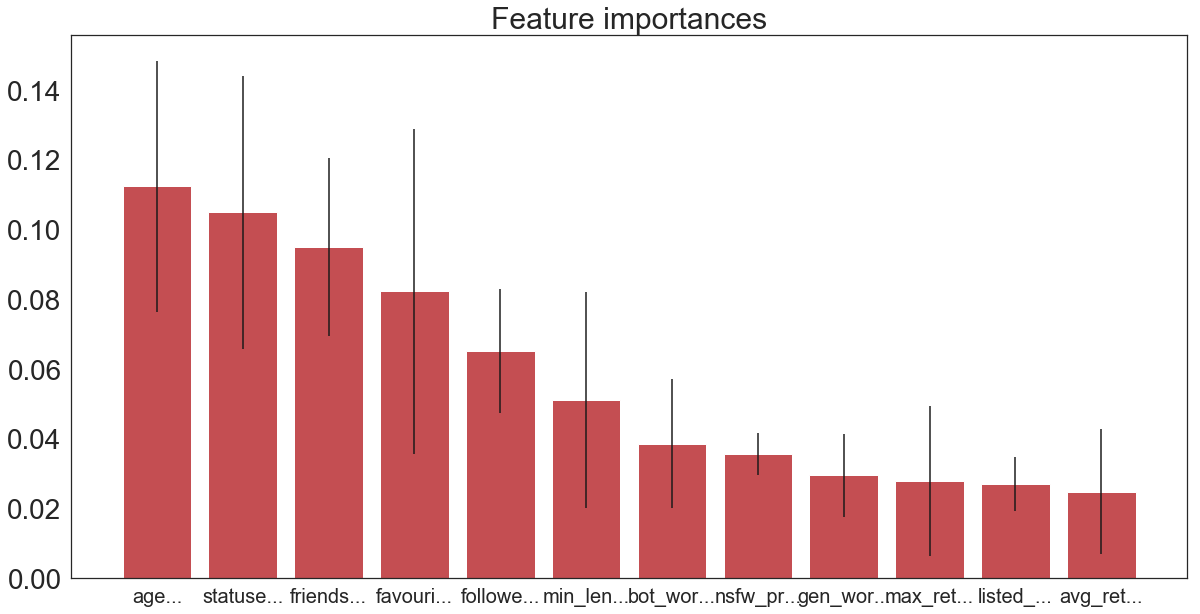

In [72]:
plot_importance(model, 'bon_importances', X, 7)

## New Grid Search

In [54]:
params = {'n_estimators':[300,500,500, 600, 700, 800], 'max_depth':[26], 'criterion':['entropy' ,'gini']}
model = RandomForestClassifier()

rf_grid = grid_search(X, y, model, params)

In [55]:
n_estimators = [300,500,500, 600, 700, 800]
max_depth = ['entropy' ,'gini']

In [56]:
results = pd.DataFrame(rf_grid.cv_results_)

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_roc_auc'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_roc_auc'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_roc_auc'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Lorenzo/anacond

In [57]:
results.sort_values(by=['param_criterion'])[['param_n_estimators', 'param_criterion','mean_test_roc_auc']]

,param_n_estimators,param_criterion,mean_test_roc_auc
0,300,entropy,0.949217
1,500,entropy,0.949628
2,500,entropy,0.949287
3,600,entropy,0.949730
4,700,entropy,0.949521
5,800,entropy,0.949571
6,300,gini,0.947712
7,500,gini,0.948260
8,500,gini,0.948114
9,600,gini,0.948142


## Visualize Results

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Lorenzo/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


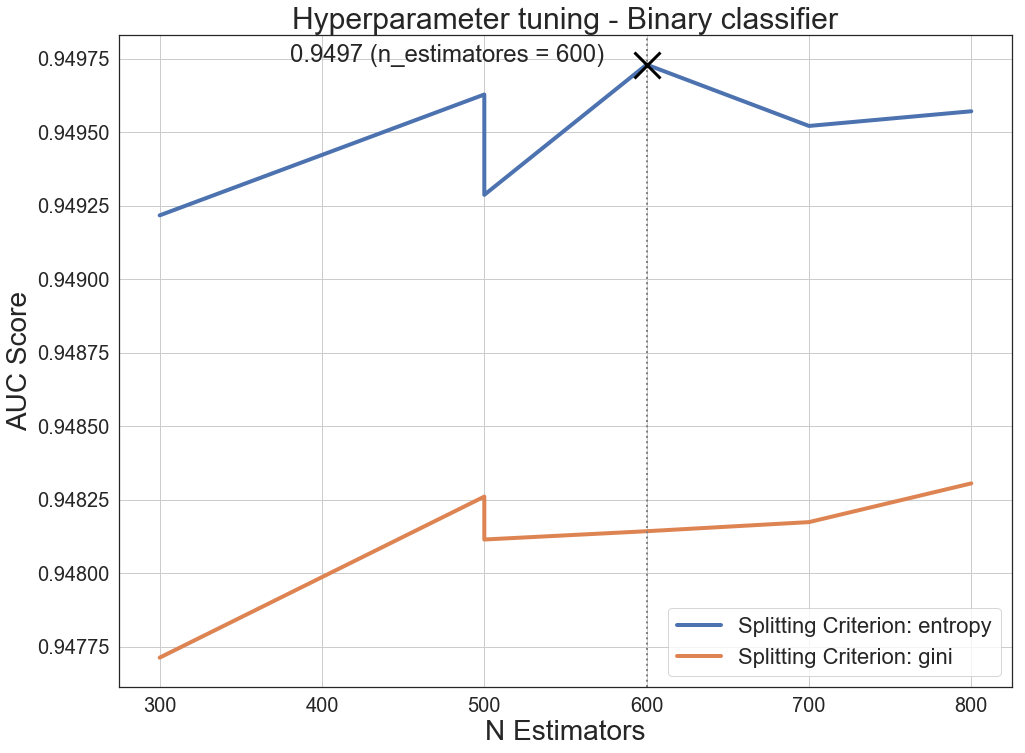

In [59]:
plot_grid_search(results.sort_values(by=['param_criterion', 'param_n_estimators']), n_estimators, max_depth, 'N Estimators', 'Splitting Criterion', 'Hyperparameter tuning - Binary classifier', 'bon_refill_tuning')

In [60]:
model = RandomForestClassifier(n_estimators=600, criterion='entropy', max_depth=26)

In [61]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
pickle.dump(model, open("../script2/models/bon_balanced.model", "wb"))

In [76]:
model = RandomForestClassifier(max_depth=26, n_estimators=600, criterion='entropy')

In [75]:
X.columns

Index(['age', 'avg_fav', 'avg_hash', 'avg_len', 'avg_ret', 'bot_words_score',
       'default_profile', 'description_len', 'favourites_count',
       'followers_count', 'freq', 'friends_count', 'gen_words_score',
       'listed_count', 'max_fav', 'max_hash', 'max_len', 'max_ret',
       'media_perc', 'min_fav', 'min_hash', 'min_len', 'min_ret', 'name_len',
       'nsfw_profile', 'profile_use_background_image', 'quote_perc',
       'ret_perc', 'screen_name_len', 'statuses_count', 'tweet_intradistance',
       'url', 'url_entropy', 'url_perc', 'verified'],
      dtype='object')

In [222]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)